# Problem Statement

1. **High Churn Rate**: Telco Company is currently grappling with an alarming churn rate of nearly 30%, a critical issue that demands immediate attention.
2. **Cost Considerations**: Research by Tianpei Xu et al. shows that retaining existing customers is 5–10 times more cost-effective than acquiring new ones, underscoring the significant financial impact of a high churn rate on revenue.
3. **Lack of Customer Segmentation**: Internally, the company faces the challenge of not having a defined customer segmentation strategy, hindering targeted approaches to address customer needs.
4. **Unclear Customer Needs**: The absence of a clear understanding of customer needs results in a lack of effective customer treatment strategies, impacting overall customer satisfaction.
5. **Cyclical Challenge**: The internal challenges mentioned above contribute to a cyclical problem, where the lack of segmentation and customer understanding feeds back into the initial issue of high churn rates.

# Aim

The overarching goal of this project is to create a sophisticated and effective model for **Customer Segmentation**. This involves leveraging the **K-Means Clustering Algorithm**, a powerful and widely used method in machine learning. By applying K-Means to customer data, the aim is to identify distinct groups or segments within the customer base based on relevant features. This segmentation will provide valuable insights into customer behavior, preferences, and characteristics.

# Dataset Description

The dataset shows the usage of telecommunication services in Q3 of a particular year adapted from a Kaggle public dataset with several modifications. There are several columns provided in the dataset:

- Customer ID (A unique customer identifier)
- Tenure Months (How long the customer has been with the company by the end of the quarter specified above)
- Location (Customer's residence - City)
- Device Class (Device classification)
- Games Product (Whether the customer uses the internet service for games product)
- Music Product (Whether the customer uses the internet service for music product)
- Education Product (Whether the customer uses the internet service for education product)
- Call Center (Whether the customer uses the call center service)
- Video Product (Whether the customer uses video product service)
- Use MyApp (Whether the customer uses MyApp service)
- Payment Method (The method used for paying the bill)
- Monthly Purchase (Total customer’s monthly spent for all services with the unit of thousands of IDR)
- Churn Label (Whether the customer left the company in this quarter)
- Longitude (Customer’s residence - Longitude)
- Latitude (Customer’s residence - Latitude)
- CLTV (Customer Lifetime Value with the unit of thousands of IDR - Calculated using company's formulas)

# Import Dataset

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
telco_data_all = pd.read_excel('dataset/Telco_customer_churn_adapted_v2.xlsx')

In [3]:
telco_data_all.head()

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0


# Data Preprocessing

In [4]:
telco_data_all

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [5]:
telco_data = telco_data_all.copy()

In [6]:
# Drop Unnecessary Column
telco_data.drop(columns=['Customer ID', 'Churn Label', 'Longitude', 'Latitude'], inplace=True)

In [7]:
categorical_features = telco_data.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
data_encoded = pd.get_dummies(telco_data, columns=categorical_features)

# Correlation Heatmap

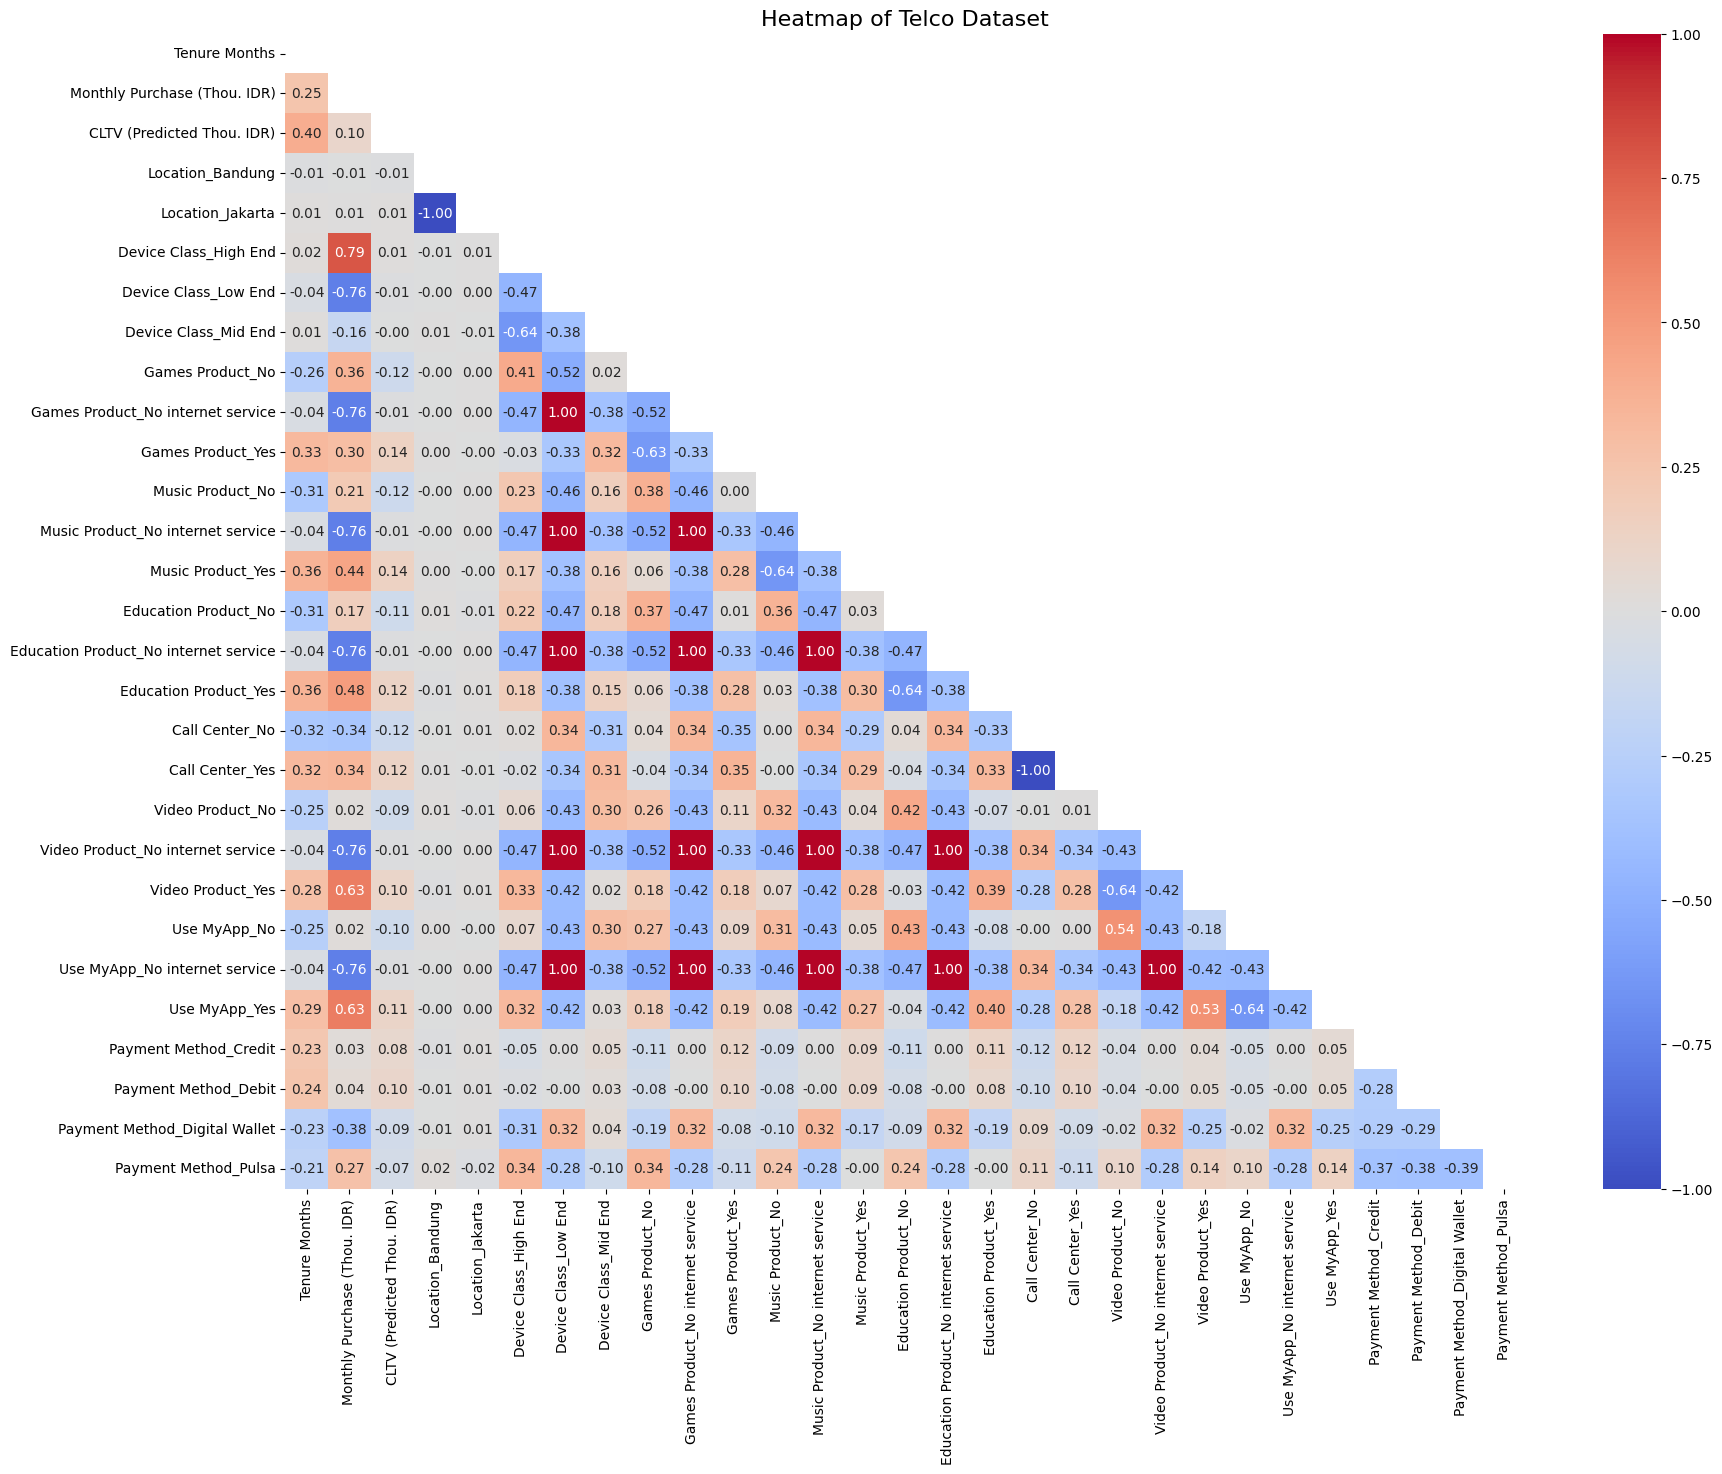

In [8]:
mask = np.zeros_like(data_encoded.corr()) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(20, 15))
plt.title('Heatmap of Telco Dataset', size=16)
sns.heatmap(data_encoded.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1, fmt='.2f');

# Feature Selection

In [9]:
corr_df = data_encoded.corr().abs()
high_corr_var=np.where(corr_df > 0.75)
high_corr_var=[(corr_df.columns[x],corr_df.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('Monthly Purchase (Thou. IDR)', 'Device Class_High End'),
 ('Monthly Purchase (Thou. IDR)', 'Device Class_Low End'),
 ('Monthly Purchase (Thou. IDR)', 'Games Product_No internet service'),
 ('Monthly Purchase (Thou. IDR)', 'Music Product_No internet service'),
 ('Monthly Purchase (Thou. IDR)', 'Education Product_No internet service'),
 ('Monthly Purchase (Thou. IDR)', 'Video Product_No internet service'),
 ('Monthly Purchase (Thou. IDR)', 'Use MyApp_No internet service'),
 ('Location_Bandung', 'Location_Jakarta'),
 ('Device Class_Low End', 'Games Product_No internet service'),
 ('Device Class_Low End', 'Music Product_No internet service'),
 ('Device Class_Low End', 'Education Product_No internet service'),
 ('Device Class_Low End', 'Video Product_No internet service'),
 ('Device Class_Low End', 'Use MyApp_No internet service'),
 ('Games Product_No internet service', 'Music Product_No internet service'),
 ('Games Product_No internet service',
  'Education Product_No internet service')

- "Monthly Purchase (Thou. IDR)" has a high correlation with several other features, particularly those indicating "No internet service" which likely implies that certain services are not being used, and thus the monthly purchase amount is affected.
- "Location_Bandung" and "Location_Jakarta" are negatively correlated as they are mutually exclusive locations.
- Several "No internet service" features are highly correlated with each other, which makes sense as they would all be set to the same value if there is no internet service.
- "Call Center_No" and "Call Center_Yes" are perfectly negatively correlated since they are complementary.

In [10]:
# Dropping the "No internet service" features since they are redundant with the service-specific features (like "Games Product", "Music Product", etc.)
# Dropping the "No internet service" features since they are redundant with the service-specific features (like "Games Product", "Music Product", etc.).
# Dropping one of the location features since each customer can only be in one location at a time.
# Dropping one of each pair of binary features that represent two sides of the same coin (like "Call Center_No" and "Call Center_Yes").
features_to_remove = [feature for feature in data_encoded if "No internet service" in feature] + \
                     ['Location_Jakarta', 'Call Center_Yes']
data_reduced = data_encoded.drop(features_to_remove, axis=1)

In [11]:
data_reduced.head()

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Location_Bandung,Device Class_High End,Device Class_Low End,Device Class_Mid End,Games Product_No,Games Product_Yes,Music Product_No,...,Education Product_Yes,Call Center_No,Video Product_No,Video Product_Yes,Use MyApp_No,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,2,70.005,4210.7,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,0
1,2,91.910,3511.3,0,1,0,0,1,0,1,...,0,1,1,0,1,0,0,0,0,1
2,8,129.545,6983.6,0,1,0,0,1,0,1,...,1,1,0,1,0,1,0,0,0,1
3,28,136.240,6503.9,0,1,0,0,1,0,1,...,1,0,0,1,0,1,0,0,0,1
4,49,134.810,6942.0,0,1,0,0,1,0,0,...,1,1,0,1,0,1,0,1,0,0


In [12]:
corr_df_reduced = data_reduced.corr().abs()
high_corr_var_reduced = np.where(corr_df_reduced > 0.75)
high_corr_var_reduced = [(corr_df_reduced.columns[x], corr_df_reduced.columns[y]) for x,y in zip(*high_corr_var_reduced) if x!=y and x<y]
high_corr_var_reduced

[('Monthly Purchase (Thou. IDR)', 'Device Class_High End'),
 ('Monthly Purchase (Thou. IDR)', 'Device Class_Low End')]

- High-end device users might be spending more monthly, and low-end device users might be spending less.

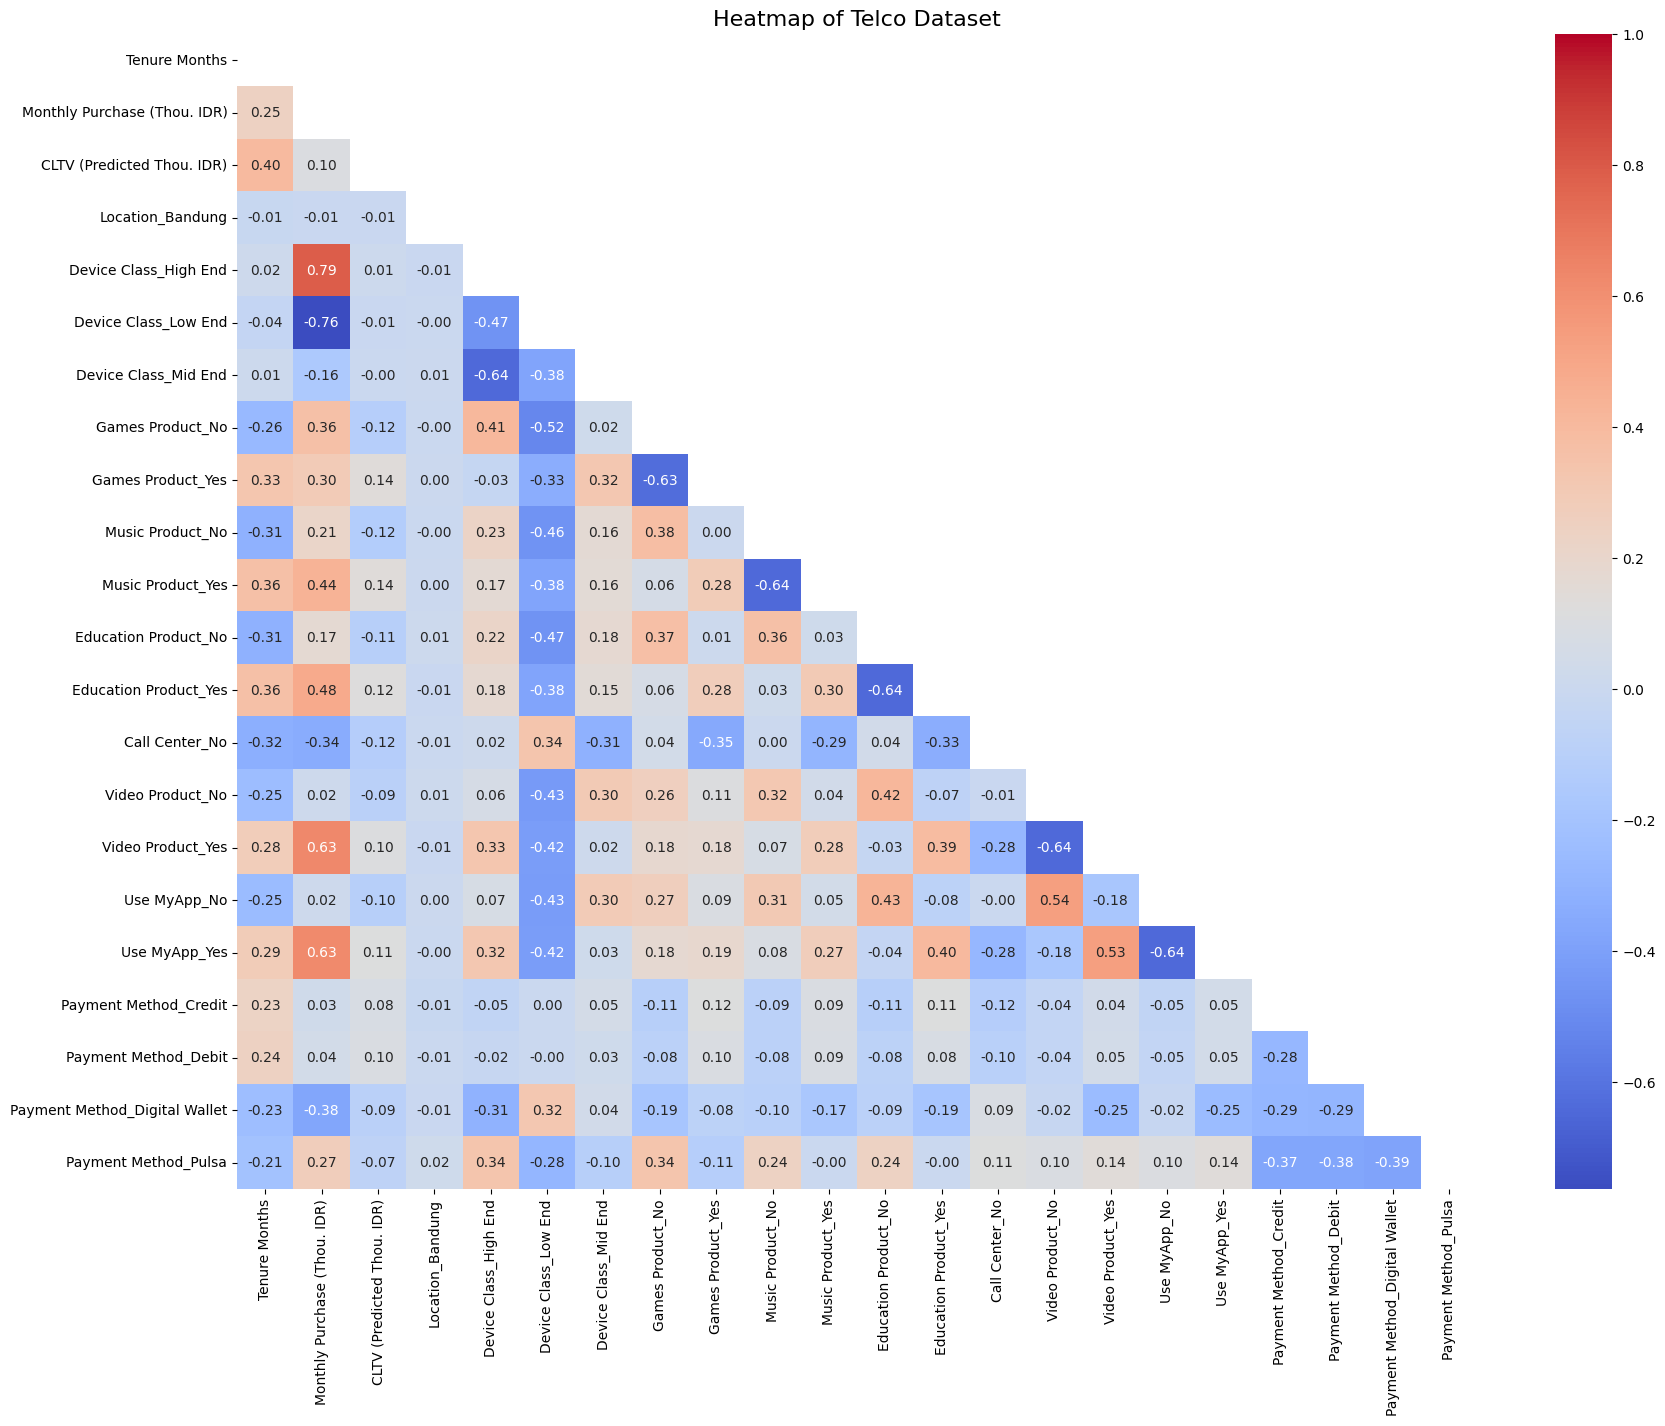

In [13]:
mask = np.zeros_like(data_reduced.corr()) 
mask[np.triu_indices_from(mask)]=True 

plt.figure(figsize=(20, 15))
plt.title('Heatmap of Telco Dataset', size=16)
sns.heatmap(data_reduced.corr(), cmap='coolwarm', annot=True, mask=mask, vmax=1, fmt='.2f');

# Scaling Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_reduced)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_reduced.columns)


In [15]:
data_scaled_df.head()

,Tenure Months,Monthly Purchase (Thou. IDR),CLTV (Predicted Thou. IDR),Location_Bandung,Device Class_High End,Device Class_Low End,Device Class_Mid End,Games Product_No,Games Product_Yes,Music Product_No,...,Education Product_Yes,Call Center_No,Video Product_No,Video Product_Yes,Use MyApp_No,Use MyApp_Yes,Payment Method_Credit,Payment Method_Debit,Payment Method_Digital Wallet,Payment Method_Pulsa
0,-1.236724,-0.362660,-0.981675,-0.632393,-0.885660,-0.525927,1.381712,-0.993349,1.577454,-0.883620,...,-0.723968,0.639439,1.227357,-0.790132,1.236489,-0.796070,-0.525047,-0.529885,1.835513,-0.711026
1,-1.236724,0.197365,-1.436462,-0.632393,1.129102,-0.525927,-0.723740,1.006696,-0.633933,1.131709,...,-0.723968,0.639439,1.227357,-0.790132,1.236489,-0.796070,-0.525047,-0.529885,-0.544807,1.406418
2,-0.992402,1.159546,0.821409,-0.632393,1.129102,-0.525927,-0.723740,1.006696,-0.633933,1.131709,...,1.381277,0.639439,-0.814759,1.265612,-0.808742,1.256171,-0.525047,-0.529885,-0.544807,1.406418
3,-0.177995,1.330711,0.509483,-0.632393,1.129102,-0.525927,-0.723740,1.006696,-0.633933,1.131709,...,1.381277,-1.563872,-0.814759,1.265612,-0.808742,1.256171,-0.525047,-0.529885,-0.544807,1.406418
4,0.677133,1.294151,0.794358,-0.632393,1.129102,-0.525927,-0.723740,1.006696,-0.633933,-0.883620,...,1.381277,0.639439,-0.814759,1.265612,-0.808742,1.256171,-0.525047,1.887201,-0.544807,-0.711026


# Dimensionality Reduction (PCA)

In [16]:
from sklearn.decomposition import PCA

# define PCA
pca = PCA(random_state=0)

# fit PCA ke dataset yang sudah discaling
pca.fit(data_scaled_df)

PCA(random_state=0)

In [17]:
pca.explained_variance_

array([4.52539091e+00, 3.69903688e+00, 2.52455448e+00, 1.48153182e+00,
       1.28238453e+00, 1.24852148e+00, 1.19040054e+00, 1.12878066e+00,
       1.02455932e+00, 9.87095601e-01, 9.28474840e-01, 9.12963940e-01,
       6.20463992e-01, 4.17314269e-01, 3.16508583e-02, 4.79729132e-30,
       1.36694906e-30, 1.12451157e-30, 5.35828561e-31, 2.75066742e-31,
       2.17306538e-31, 1.03694401e-31])

In [18]:
pca.explained_variance_ratio_

array([2.05670381e-01, 1.68114167e-01, 1.14736183e-01, 6.73327940e-02,
       5.82819294e-02, 5.67429186e-02, 5.41014327e-02, 5.13009266e-02,
       4.65642656e-02, 4.48616113e-02, 4.21974096e-02, 4.14924688e-02,
       2.81989043e-02, 1.89661371e-02, 1.43847111e-03, 2.18027736e-31,
       6.21252259e-32, 5.11069047e-32, 2.43523855e-32, 1.25012585e-32,
       9.87616743e-33, 4.71271264e-33])

In [19]:
df_var = pd.DataFrame({
    'PC' : range(0,22),
    'Variance' : pca.explained_variance_ratio_,
    'Cumulative Var' : pca.explained_variance_ratio_.cumsum()
})

df_var.head()

,PC,Variance,Cumulative Var
0,0,0.205670,0.205670
1,1,0.168114,0.373785
2,2,0.114736,0.488521
3,3,0.067333,0.555854
4,4,0.058282,0.614135


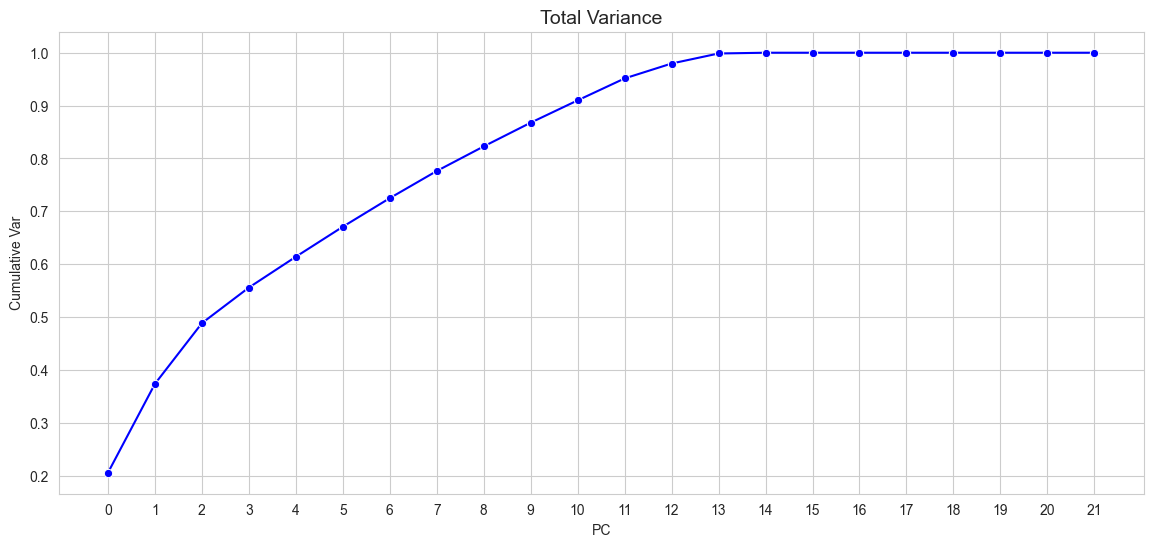

In [20]:
# cummulative sum of variance dari seluruh 17 components
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
sns.lineplot(data=df_var, x='PC', y='Cumulative Var', color='b', marker='o')
plt.xticks(range(0,22))
plt.title('Total Variance', size=14)
plt.show()

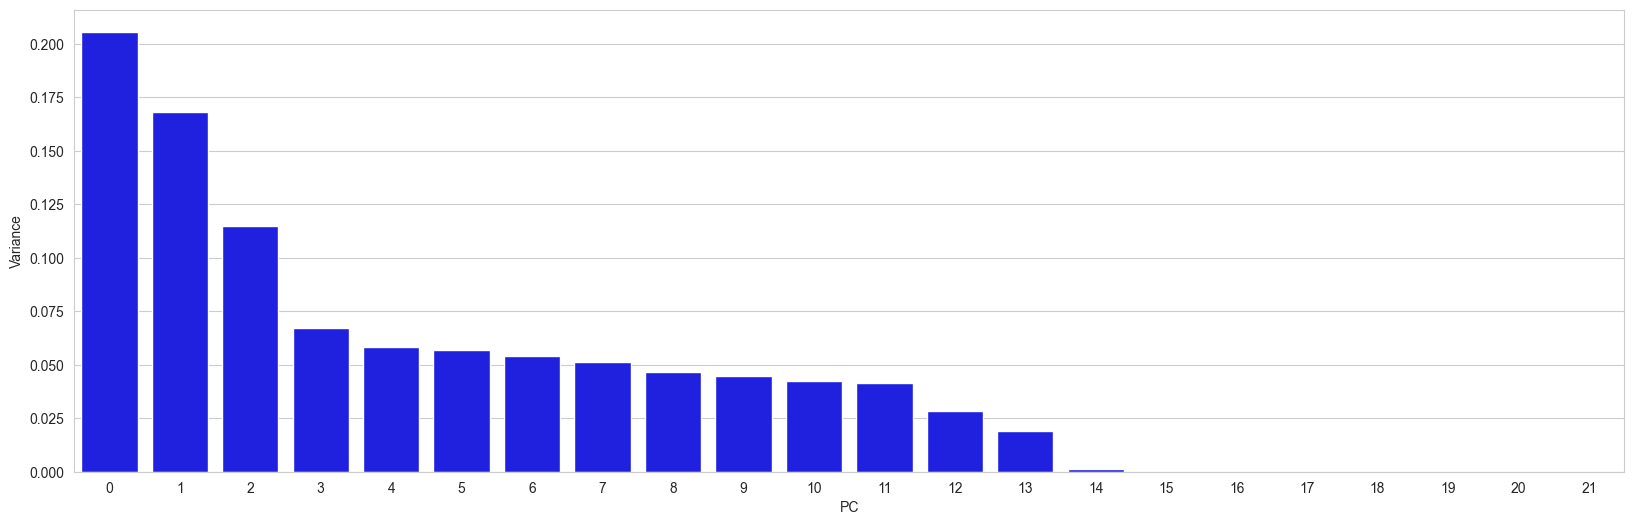

In [21]:
# Variance yang dapat dijelaskan oleh tiap component (17 components)

plt.figure(figsize=(20,6))
sns.barplot(data=df_var, x='PC', y='Variance', color='b')
plt.show()

In [22]:
# Variance pada PC-0
pca.explained_variance_ratio_[0]

0.2056703805534995

In [23]:
# Variance pada PC-1
pca.explained_variance_ratio_[1]


0.1681141669817595

In [24]:
# Variance pada PC-0 dan PC-1
pca.explained_variance_ratio_[0:3].sum()

0.48852073094013504

In [25]:
# 3 principal components
pca_3com = PCA(n_components=3, random_state=0)

# fit dan transform
X_pca_3com = pca_3com.fit_transform(data_scaled_df)

# K-Means Clustering


## Elbow Method w/o PCA

In [26]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(data_scaled_df) for k in range (2, 10)]
kmeans_models 

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0)]

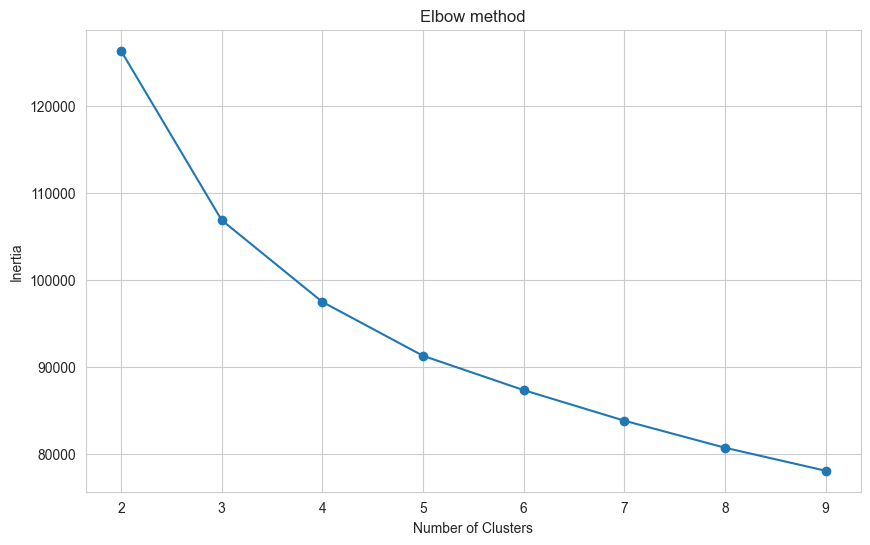

In [27]:
list_inertia = [kmeans.inertia_ for kmeans in kmeans_models]

plt.figure(figsize=(10, 6))
plt.plot(range(2,10), list_inertia, '-o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2,10));

## Elbow Method with PCA

In [28]:
kmeans_models_pca = [KMeans(n_clusters=k, random_state=0).fit(X_pca_3com) for k in range (2, 10)]
kmeans_models_pca

[KMeans(n_clusters=2, random_state=0),
 KMeans(n_clusters=3, random_state=0),
 KMeans(n_clusters=4, random_state=0),
 KMeans(n_clusters=5, random_state=0),
 KMeans(n_clusters=6, random_state=0),
 KMeans(n_clusters=7, random_state=0),
 KMeans(random_state=0),
 KMeans(n_clusters=9, random_state=0)]

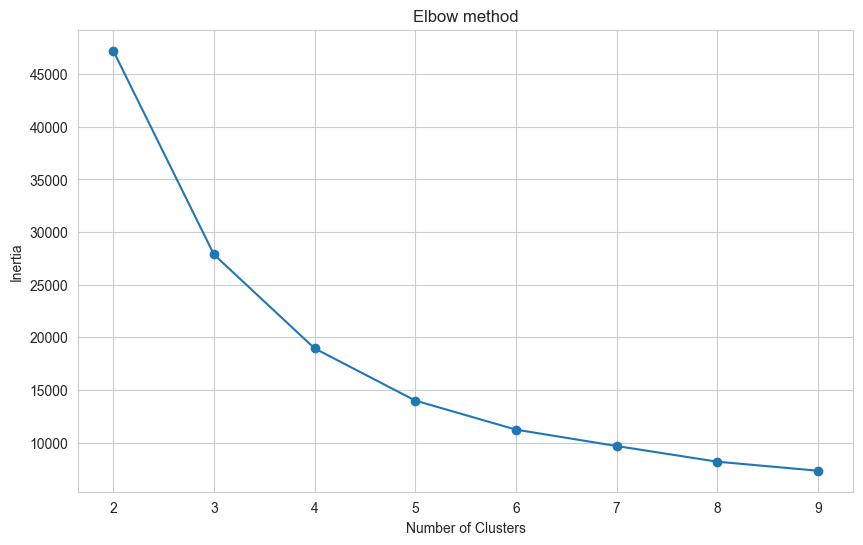

In [29]:
list_inertia_pca = [kmeans.inertia_ for kmeans in kmeans_models_pca]

plt.figure(figsize=(10, 6))
plt.plot(range(2,10), list_inertia_pca, '-o')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(2,10));

## Silhouette Method w/o PCA

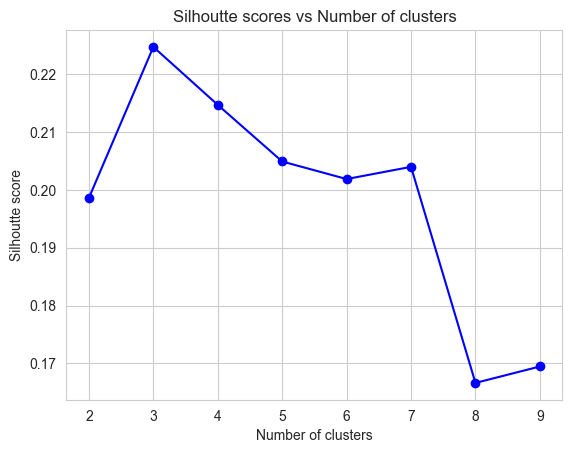

In [30]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(data_scaled_df, kmeans.labels_) for kmeans in kmeans_models]

plt.plot(range(2, 10), silhoutte_scores, 'bo-')

plt.xticks(range(2,10))
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score');

In [31]:
silhoutte_scores

[0.19862858060691804,
 0.22473947138978612,
 0.21470950984677736,
 0.20491870390876302,
 0.20188108408979394,
 0.20399292831416124,
 0.1666111248520956,
 0.1694524766034343]

## Silhouette Method with PCA

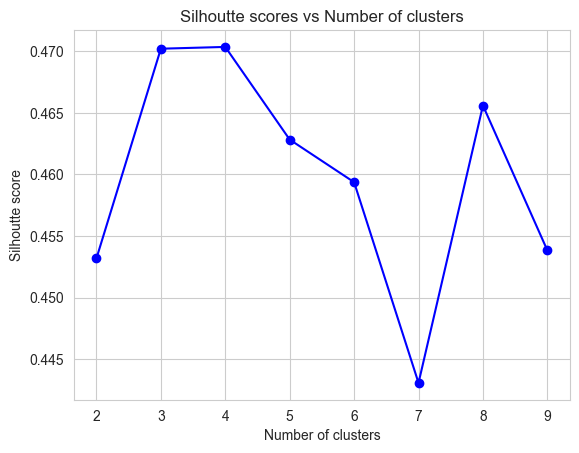

In [32]:
silhoutte_scores_pca = [silhouette_score(X_pca_3com, kmeans.labels_) for kmeans in kmeans_models_pca]

plt.plot(range(2, 10), silhoutte_scores_pca, 'bo-')

plt.xticks(range(2,10))
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score');

In [33]:
silhoutte_scores_pca

[0.4531865921151647,
 0.4702053217640995,
 0.4703502610986166,
 0.46282800580315897,
 0.4593691246887912,
 0.4430774749085385,
 0.4655937904302895,
 0.4538355400369417]

## Clustering with 4 Clusters

In [34]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_pca_3com)

cluster = kmeans.labels_

cluster[0:100]

array([0, 3, 3, 3, 1, 0, 3, 2, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3,
       2, 1, 1, 1, 3, 3, 3, 3, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 3, 1, 3, 0,
       0, 3, 3, 0, 3, 3, 1, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 2,
       3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 1, 3, 1, 3, 3, 3, 1, 1,
       1, 3, 3, 0, 3, 0, 3, 3, 1, 0, 3, 2], dtype=int32)

In [35]:
df_pca = pd.DataFrame(data=X_pca_3com, columns=['PC0', 'PC1', 'PC2'])

df_pca['labels'] = cluster
df_pca.head()

,PC0,PC1,PC2,labels
0,1.482868,1.137022,2.959512,0
1,0.233642,3.929053,-0.900615,3
2,-2.198528,0.500346,-2.798490,3
3,-2.859287,0.019494,-2.163795,3
4,-2.676559,-1.800014,-1.644763,1


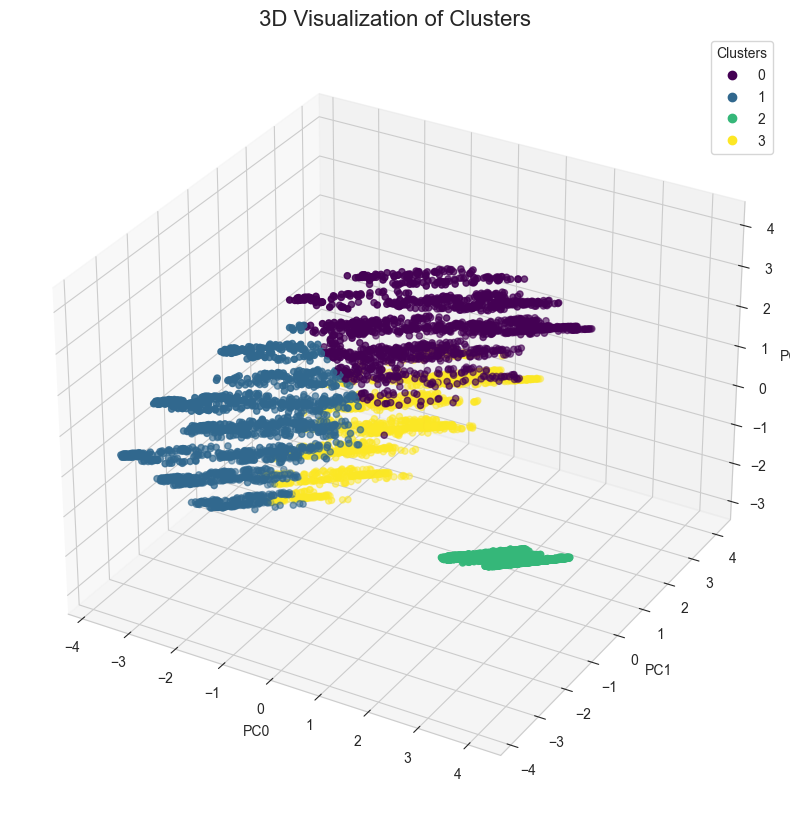

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Visualize clusters in 3D space (PC0, PC1, PC2)
scatter = ax.scatter(df_pca['PC0'], df_pca['PC1'], df_pca['PC2'], c=df_pca['labels'], cmap='viridis')

# Customize the plot
ax.set_xlabel('PC0')
ax.set_ylabel('PC1')
ax.set_zlabel('PC2')
plt.title('3D Visualization of Clusters', fontsize=16)
plt.legend(*scatter.legend_elements(), title='Clusters')
plt.show()

In [37]:
telco_data_all['Cluster Label'] = cluster

In [38]:
telco_data_all

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Cluster Label
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,0
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,3
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,3
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8,2
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0,1
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0,1
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9,0


In [39]:
telco_data_all.to_csv('telco_data_clustered.csv', index=False)

## Cluster Interpretation

In [40]:
telco_data_all

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR),Cluster Label
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7,0
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3,3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6,3
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9,3
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8,2
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0,1
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0,1
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9,0


In [41]:
cluster_distribution = telco_data_all['Cluster Label'].value_counts()

In [42]:
cluster_summary = telco_data_all.groupby('Cluster Label').mean()

In [43]:
cluster_distribution

3    1991
1    1891
0    1635
2    1526
Name: Cluster Label, dtype: int64

In [44]:
cluster_summary

,Customer ID,Tenure Months,Monthly Purchase (Thou. IDR),Longitude,Latitude,CLTV (Predicted Thou. IDR)
Cluster Label,,,,,,
0,3739.285627,25.368196,69.118575,107.050486,-6.410707,5514.886239
1,3850.848757,54.228979,119.373548,107.035609,-6.397301,6361.122052
2,4192.110747,30.547182,27.402952,107.042759,-6.403744,5686.696658
3,2514.090909,18.759920,106.675251,107.044929,-6.405700,5306.402813


In [45]:
pd.pivot_table(telco_data_all, index=['Cluster Label', 'Device Class'], values='Tenure Months', aggfunc='count')

Tenure Months
Cluster Label Device Class               
0             High End                134
              Mid End                1501
1             High End               1147
              Mid End                 744
2             Low End                1526
3             High End               1815
              Mid End                 176

In [46]:
pd.pivot_table(telco_data_all, index=['Cluster Label', 'Use MyApp'], values='Tenure Months', aggfunc='count')

Tenure Months
Cluster Label Use MyApp                         
0             No                            1434
              Yes                            201
1             No                             281
              Yes                           1610
2             No internet service           1526
3             No                            1070
              Yes                            921

In [47]:
pd.pivot_table(telco_data_all, index=['Cluster Label', 'Games Product'], values='Tenure Months', aggfunc='count')

Tenure Months
Cluster Label Games Product                     
0             No                             837
              Yes                            798
1             No                             808
              Yes                           1083
2             No internet service           1526
3             No                            1853
              Yes                            138

In [48]:
pd.pivot_table(telco_data_all, index=['Cluster Label', 'Call Center'], values='Tenure Months', aggfunc='count')

Tenure Months
Cluster Label Call Center               
0             No                     995
              Yes                    640
1             No                     746
              Yes                   1145
2             No                    1526
3             No                    1732
              Yes                    259

**Cluster 0 ("Cost-Conscious Regulars")**
- Moderate tenure with lower monthly spending.
- These customers are regular users but seem to be more cost-conscious, possibly opting for basic service packages.
- They may be sensitive to price changes or may be inclined to switch if they find a better deal elsewhere.
- Mostly Mid End Device
- Mostly Not Using MyApp
  
**Cluster 1 ("Loyal High Value")**
- Long tenure with high monthly spending.
- This group appears to be the most loyal and valuable customers of the company, likely subscribing to premium services and could be the main revenue drivers.
- Mostly High End Device
- Mostly Using MyApp

**Cluster 2 ("Basic Users")**
- Moderate tenure with the lowest monthly spending.
- They might be using only the most essential services and could represent individuals who may need only basic functionalities or those who are potentially at risk of churning due to low engagement.
- All Low End Device & No Internet Service

**Cluster 3 ("New Enthusiasts")**
- Short tenure with relatively high monthly spending. 
- They are newer to the services but are already spending a significant amount, which might indicate that they are trying out various services or are enthusiastic about the offerings.
- Mostly High End Device

In [49]:
telco_data_all['Cluster Label'].value_counts()

3    1991
1    1891
0    1635
2    1526
Name: Cluster Label, dtype: int64

In [50]:
ccr_cust = telco_data_all['Cluster Label'].value_counts()[0]
lhv_cust = telco_data_all['Cluster Label'].value_counts()[1]
bu_cust = telco_data_all['Cluster Label'].value_counts()[2]
ne_cust = telco_data_all['Cluster Label'].value_counts()[3]

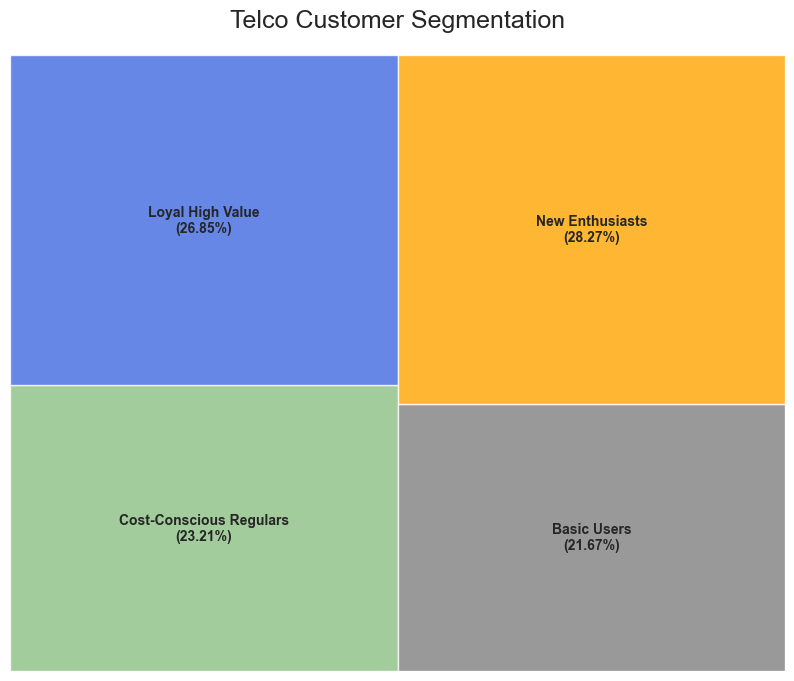

In [51]:
import squarify
from matplotlib.font_manager import FontProperties

segments = ['Cost-Conscious Regulars', 'Loyal High Value', 'Basic Users', 'New Enthusiasts']
counts = [ccr_cust, lhv_cust, bu_cust, ne_cust]

total_customers = sum(counts)
percentages = [(count / total_customers) * 100 for count in counts]

labels = [f'{segment}\n({percentage:.2f}%)' for segment, percentage in zip(segments, percentages)]

color_list = ['#8CC084', '#4169E1', '#808080', '#FFA500']

fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 8)
squarify.plot(sizes=counts, label=labels, alpha=0.8, color=color_list, text_kwargs={'fontproperties': FontProperties(weight='bold')})
plt.title("Telco Customer Segmentation", fontsize=18, pad=20)
plt.axis('off')
plt.show()